In [1]:
import numpy as np
import pandas as pd
import os
from os import listdir
from os.path import isfile,join
import csv
import matplotlib.pyplot as plt
pd.__version__

'1.2.4'

Read data with the correct header, drop first row (unit of measurement) and last column (empty)

In [2]:
data = pd.read_csv('ine_principais_culturas_agricolas.csv', sep = ';', header = [4,6], nrows = 8, encoding = 'latin_1')#.iloc[:,1:14]
data = data.drop(labels = 0 ,axis = 0)
data = data.drop(columns=['Unnamed: 3421_level_0'])
data

C:\Users\crysi\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Unnamed: 0_level_0,2021,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 3411_level_0,Unnamed: 3412_level_0,Unnamed: 3413_level_0,Unnamed: 3414_level_0,Unnamed: 3415_level_0,Unnamed: 3416_level_0,Unnamed: 3417_level_0,Unnamed: 3418_level_0,Unnamed: 3419_level_0,Unnamed: 3420_level_0
,Unnamed: 0_level_1,Cereais para grão,Trigo,Trigo mole,Trigo duro,Centeio,Aveia,Cevada,Triticale,Milho,...,Avelã,Vinha,Uva para vinho,Uva para vinho (DOP),Uva para vinho (IGP),Uva para vinho (Vinhos sem certificação),Uva de mesa,Olival,Azeitona de mesa,Azeitona para azeite
1,PT: Portugal,5372,2342,2272,2734,1142,1213,2901,1467,10105,...,1334,4199,4122,x x,x x,x x,6720,1048,1961,1018
2,1: Continente,5373,2342,2272,2734,1142,1213,2901,1467,10110,...,1334,4124,4046,x x,x x,x x,6720,1048,1961,1018
3,11: Norte,3632,1689,1689,- -,1405,990,994,1511,5190,...,1453,3853,3852,x x,x x,x x,4924,1463,2777,1380
4,16: Centro,6609,1934,1893,2460,712,858,3027,1087,9931,...,1283,4153,4047,x x,x x,x x,8552,1155,1546,1143
5,17: Área Metropolitana de Lisboa,7356,3803,3911,2955,- -,1490,3648,2298,13201,...,555,4184,4040,x x,x x,x x,7580,110,- -,110
6,18: Alentejo,5386,2492,2425,2800,911,1307,2974,1483,13845,...,1305,4713,4777,x x,x x,x x,3948,772,1552,753
7,15: Algarve,1609,1107,1071,1254,641,863,902,811,9120,...,1000,4947,2266,x x,x x,x x,8674,1980,774,2027


Extract region index and region name from first column, and set the row index to the specific region index

In [3]:
region_Index_and_Name = [i.split(':') for i in data.iloc[:,0]]
region_Index = [i[0] for i in region_Index_and_Name]
region_Name = [i[1] for i in region_Index_and_Name]
data.index = region_Index
data.iloc[:,0] = region_Name
data

,Unnamed: 0_level_0,2021,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 3411_level_0,Unnamed: 3412_level_0,Unnamed: 3413_level_0,Unnamed: 3414_level_0,Unnamed: 3415_level_0,Unnamed: 3416_level_0,Unnamed: 3417_level_0,Unnamed: 3418_level_0,Unnamed: 3419_level_0,Unnamed: 3420_level_0
,Unnamed: 0_level_1,Cereais para grão,Trigo,Trigo mole,Trigo duro,Centeio,Aveia,Cevada,Triticale,Milho,...,Avelã,Vinha,Uva para vinho,Uva para vinho (DOP),Uva para vinho (IGP),Uva para vinho (Vinhos sem certificação),Uva de mesa,Olival,Azeitona de mesa,Azeitona para azeite
PT,Portugal,5372,2342,2272,2734,1142,1213,2901,1467,10105,...,1334,4199,4122,x x,x x,x x,6720,1048,1961,1018
1,Continente,5373,2342,2272,2734,1142,1213,2901,1467,10110,...,1334,4124,4046,x x,x x,x x,6720,1048,1961,1018
11,Norte,3632,1689,1689,- -,1405,990,994,1511,5190,...,1453,3853,3852,x x,x x,x x,4924,1463,2777,1380
16,Centro,6609,1934,1893,2460,712,858,3027,1087,9931,...,1283,4153,4047,x x,x x,x x,8552,1155,1546,1143
17,Área Metropolitana de Lisboa,7356,3803,3911,2955,- -,1490,3648,2298,13201,...,555,4184,4040,x x,x x,x x,7580,110,- -,110
18,Alentejo,5386,2492,2425,2800,911,1307,2974,1483,13845,...,1305,4713,4777,x x,x x,x x,3948,772,1552,753
15,Algarve,1609,1107,1071,1254,641,863,902,811,9120,...,1000,4947,2266,x x,x x,x x,8674,1980,774,2027


Rename first column index (year) to fit the right year for every column, and add as new MultiIndex

In [4]:
column_index_year = data.columns.get_level_values(0).to_series()
column_index_year  = column_index_year.mask(column_index_year.apply(lambda i: i.startswith('Unnamed'))).ffill()
column_index_year[0] = ""
column_index_product = data.columns.get_level_values(1).to_series()
column_index_product[0] = ""
data.columns = pd.MultiIndex.from_arrays([column_index_year,column_index_product], names=('Year', 'Product') )
data

Year                                                2021                   \
Product                                Cereais para grão Trigo Trigo mole   
PT                            Portugal              5372  2342       2272   
1                           Continente              5373  2342       2272   
11                               Norte              3632  1689       1689   
16                              Centro              6609  1934       1893   
17        Área Metropolitana de Lisboa              7356  3803       3911   
18                            Alentejo              5386  2492       2425   
15                             Algarve              1609  1107       1071   

Year                                                      ...  1986        \
Product Trigo duro Centeio Aveia Cevada Triticale  Milho  ... Avelã Vinha   
PT            2734    1142  1213   2901      1467  10105  ...  1334  4199   
1             2734    1142  1213   2901      1467  10110  ...  1334  4124   
11             - -    1405   990    994      1511   5190  ...  1453  3853   
16            2460     712   858   3027      1087   9931  ...  1283  4153   
17            2955     - -  1490   3648      2298  13201  ...   555  4184   
18            2800     911  1307   2974      1483  13845  ...  1305  4713   
15            1254     641   863    902       811   9120  ...  1000  4947   

Year                                                              \
Product Uva para vinho Uva para vinho (DOP) Uva para vinho (IGP)   
PT                4122                  x x                  x x   
1                 4046                  x x                  x x   
11                3852                  x x                  x x   
16                4047                  x x                  x x   
17                4040                  x x                  x x   
18                4777                  x x                  x x   
15                2266                  x x                  x x   

Year                                                                 \
Product Uva para vinho (Vinhos sem certificação) Uva de mesa Olival   
PT                                           x x        6720   1048   
1                                            x x        6720   1048   
11                                           x x        4924   1463   
16                                           x x        8552   1155   
17                                           x x        7580    110   
18                                           x x        3948    772   
15                                           x x        8674   1980   

Year                                           
Product Azeitona de mesa Azeitona para azeite  
PT                  1961                 1018  
1                   1961                 1018  
11                  2777                 1380  
16                  1546                 1143  
17                   - -                  110  
18                  1552                  753  
15                   774                 2027  

[7 rows x 3421 columns]

Bad Data

In [5]:
data["2021"]["Vinha"]

PT    5568 &
1     5604 &
11    4091 &
16    5818 &
17    9120 &
18    8178 &
15    3070 &
Name: Vinha, dtype: object

In [6]:
data["1986"]["Uva para vinho (IGP)"]

PT    x x
1     x x
11    x x
16    x x
17    x x
18    x x
15    x x
Name: Uva para vinho (IGP), dtype: object

In [7]:
data["2021"]["Trigo duro"]

PT    2734
1     2734
11     - -
16    2460
17    2955
18    2800
15    1254
Name: Trigo duro, dtype: object

Clean Data

In [8]:
for i in range(1,len(data.columns)):
    data.iloc[:,i] = data.iloc[:,i].astype(str).str.split(" ").str[0]
data.replace('-', 0, inplace = True)
data.replace('x', -999, inplace = True)
data.iloc[:,1:] = data.iloc[:,1:].astype(int)
data.replace(-999, 'NaN', inplace = True)

data

Year                                                2021                   \
Product                                Cereais para grão Trigo Trigo mole   
PT                            Portugal              5372  2342       2272   
1                           Continente              5373  2342       2272   
11                               Norte              3632  1689       1689   
16                              Centro              6609  1934       1893   
17        Área Metropolitana de Lisboa              7356  3803       3911   
18                            Alentejo              5386  2492       2425   
15                             Algarve              1609  1107       1071   

Year                                                      ...  1986        \
Product Trigo duro Centeio Aveia Cevada Triticale  Milho  ... Avelã Vinha   
PT            2734    1142  1213   2901      1467  10105  ...  1334  4199   
1             2734    1142  1213   2901      1467  10110  ...  1334  4124   
11               0    1405   990    994      1511   5190  ...  1453  3853   
16            2460     712   858   3027      1087   9931  ...  1283  4153   
17            2955       0  1490   3648      2298  13201  ...   555  4184   
18            2800     911  1307   2974      1483  13845  ...  1305  4713   
15            1254     641   863    902       811   9120  ...  1000  4947   

Year                                                              \
Product Uva para vinho Uva para vinho (DOP) Uva para vinho (IGP)   
PT                4122                  NaN                  NaN   
1                 4046                  NaN                  NaN   
11                3852                  NaN                  NaN   
16                4047                  NaN                  NaN   
17                4040                  NaN                  NaN   
18                4777                  NaN                  NaN   
15                2266                  NaN                  NaN   

Year                                                                 \
Product Uva para vinho (Vinhos sem certificação) Uva de mesa Olival   
PT                                           NaN        6720   1048   
1                                            NaN        6720   1048   
11                                           NaN        4924   1463   
16                                           NaN        8552   1155   
17                                           NaN        7580    110   
18                                           NaN        3948    772   
15                                           NaN        8674   1980   

Year                                           
Product Azeitona de mesa Azeitona para azeite  
PT                  1961                 1018  
1                   1961                 1018  
11                  2777                 1380  
16                  1546                 1143  
17                     0                  110  
18                  1552                  753  
15                   774                 2027  

[7 rows x 3421 columns]

In [9]:
data["2021"]["Vinha"]

PT    5568
1     5604
11    4091
16    5818
17    9120
18    8178
15    3070
Name: Vinha, dtype: int64

In [10]:
data["1986"]["Uva para vinho (IGP)"]

PT    NaN
1     NaN
11    NaN
16    NaN
17    NaN
18    NaN
15    NaN
Name: Uva para vinho (IGP), dtype: object

In [11]:
data["2021"]["Trigo duro"]

PT    2734
1     2734
11       0
16    2460
17    2955
18    2800
15    1254
Name: Trigo duro, dtype: int64

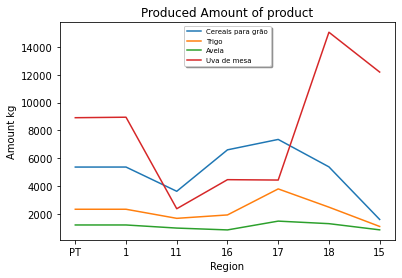

In [12]:
plt.plot(data["2021"]['Cereais para grão'], label = "Cereais para grão")
plt.plot(data["2021"]['Trigo'], label = "Trigo")
plt.plot(data["2021"]['Aveia'], label = "Aveia")
plt.plot(data["2021"]['Uva de mesa'], label = "Uva de mesa")

plt.title('Produced Amount of product')
plt.xlabel('Region')
plt.ylabel('Amount kg')
legend = plt.legend(loc='upper center', shadow=True, fontsize='x-small')

plt.show()

Import all temperature data (all stations and each tmin + tmax)

In [13]:
file_path = os.getcwd()
data_path=file_path+'\\'+'IPMA'
file_names=[".".join(f.split(".")[:-1]) for f in listdir(data_path) if isfile (join(data_path,f))] 
full_file_names=[f for f in listdir(data_path) if isfile (join(data_path,f))]

tmin_names = []
tmax_names = []
station_names = []
for i in range(len(full_file_names)):
    tmin_names.append('tmin_station_'+full_file_names[i].split("-")[0]) 
    tmax_names.append('tmax_station_'+full_file_names[i].split("-")[0]) 
    station_names.append('station_'+full_file_names[i].split("-")[0])
    #prec_names.append('tmin_station_'+full_file_names[i].split("-")[0]) 

full_file_names

['11-tx-tn-prec.xlsx',
 '132-tx-tn-prec.xlsx',
 '170-tx-tn-prec.xlsx',
 '205-tx-tn-prec.xlsx',
 '320-tx-tn-prec.xlsx',
 '360-tx-tn-prec.xlsx',
 '522-tx-tn-prec.xlsx',
 '535-tx-tn-prec.xlsx',
 '546-tx-tn-prec.xlsx',
 '549-tx-tn-prec.xlsx',
 '554-tx-tn-prec.xlsx',
 '557-tx-tn-prec.xlsx',
 '562-tx-tn-prec.xlsx',
 '568-tx-tn-prec.xlsx',
 '571-tx-tn-prec.xlsx',
 '575-tx-tn-prec.xlsx']

In [14]:
station_names

['station_11',
 'station_132',
 'station_170',
 'station_205',
 'station_320',
 'station_360',
 'station_522',
 'station_535',
 'station_546',
 'station_549',
 'station_554',
 'station_557',
 'station_562',
 'station_568',
 'station_571',
 'station_575']

In [15]:
z=0
tmin_files_ready=[]
tmax_files_ready=[]
for mi, ma, r, s in zip(tmin_names, tmax_names, full_file_names, station_names):
    globals()[mi]=pd.read_excel(data_path+'\\'+r, sheet_name = 'tmin', usecols = range(0,13))
    globals()[ma]=pd.read_excel(data_path+'\\'+r, sheet_name = 'tmax', usecols = range(0,13))
    globals()[mi].index =  globals()[mi]['year']
    globals()[ma].index =  globals()[ma]['year']
    globals()[mi] = globals()[mi].drop(columns = ["year"])
    globals()[ma] = globals()[ma].drop(columns = ["year"])
    globals()[ma] = globals()[ma].set_axis(globals()[mi].columns, axis=1, inplace=False)
    globals()[s] = pd.concat([globals()[mi], globals()[ma]], keys=['tmin', 'tmax'], axis=1).reorder_levels([1,0],axis=1)
    tmin_files_ready.append(mi)
    tmax_files_ready.append(ma)
    z+=1
tmin_files_ready

['tmin_station_11',
 'tmin_station_132',
 'tmin_station_170',
 'tmin_station_205',
 'tmin_station_320',
 'tmin_station_360',
 'tmin_station_522',
 'tmin_station_535',
 'tmin_station_546',
 'tmin_station_549',
 'tmin_station_554',
 'tmin_station_557',
 'tmin_station_562',
 'tmin_station_568',
 'tmin_station_571',
 'tmin_station_575']

In [ ]:
station_575

In [ ]:
plt.plot(station_360['Jan'], label = "January")
plt.plot(station_360['Oct'], label = "October")
plt.title('Temperature measured by station 360')
plt.xlabel('Year')
plt.ylabel('Temperature')
legend = plt.legend(loc='lower right', shadow=True, fontsize='x-small')
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.fill_between(station_360['Jan'].index, station_360['Jan']['tmin'], station_360['Jan']['tmax'], alpha=.5, linewidth=0, label = "Min/Max")
ax.plot(station_360['Jan'].index, (station_360['Jan']['tmin'] + station_360['Jan']['tmax'])/2, linewidth=2, label = "Average")
plt.title('Temperature measured by station 360')
plt.xlabel('Year')
plt.ylabel('Temperature')
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')

plt.show()

In [ ]:
plt.plot(station_557.loc[1950].iloc[:12].values, label = '1950')
plt.plot(station_557.loc[2005].iloc[:12].values, label = '2005')
plt.title('Min Temperature measured by station 557')
plt.xlabel('Month')
plt.ylabel('Min Temperature')
legend = plt.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.show()